In [162]:
#Read in Libraries and Depnedencies 
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import calendar
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
os.chdir(r"C:\Users\jcmar\Desktop\RUTJC201904DATA3\TableauHW")

In [2]:
# Make a reference to the file path
csv_path = "combined_csv.csv"

# Import the combined_csv file as a DataFrame
citibike_df = pd.read_csv(csv_path, encoding="utf-8")
citibike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


In [3]:
# Select Relevant Columns in new dataframe
citibike = citibike_df[['tripduration', 'starttime','stoptime', 'start station latitude', 'start station longitude', 
                                                 'usertype', 'birth year', 'gender']].copy()
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,40.778968,-73.973747,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,40.751873,-73.977706,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,40.785247,-73.976673,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,40.732219,-73.981656,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,40.727434,-73.993790,Subscriber,1979,1


In [4]:
#Change gender to Unknown (0), Male (1), Female (2) - Per Citibike Data
citibike['gender'].replace([0,1,2],['Unknown','Male','Female'],inplace=True)
#subtract birth year by 2019 to ascertain age of rider
citibike['birth year'] = citibike['birth year'] - 2019
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,40.778968,-73.973747,Subscriber,-48,Male
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,40.751873,-73.977706,Subscriber,-55,Male
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,40.785247,-73.976673,Subscriber,-32,Male
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,40.732219,-73.981656,Subscriber,-29,Male
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,40.727434,-73.993790,Subscriber,-40,Male


In [5]:
#convert birth year negative numbers into positive numbers
citibike['birth year2'] = citibike['birth year']*-1
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender,birth year2
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,40.778968,-73.973747,Subscriber,-48,Male,48
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,40.751873,-73.977706,Subscriber,-55,Male,55
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,40.785247,-73.976673,Subscriber,-32,Male,32
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,40.732219,-73.981656,Subscriber,-29,Male,29
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,40.727434,-73.993790,Subscriber,-40,Male,40


In [6]:
#Change StartTime to Year and Time Column and Month to Month Column
citibike['starttime'] = pd.to_datetime(citibike['starttime'])
citibike['stoptime'] = pd.to_datetime(citibike['stoptime'])
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender,birth year2
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,40.778968,-73.973747,Subscriber,-48,Male,48
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,40.751873,-73.977706,Subscriber,-55,Male,55
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,40.785247,-73.976673,Subscriber,-32,Male,32
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,40.732219,-73.981656,Subscriber,-29,Male,29
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,40.727434,-73.993790,Subscriber,-40,Male,40


In [7]:
# Rename comlumns
citibike2 = citibike.rename(columns={'birth year2': 'age'})
citibike2.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender,age
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,40.778968,-73.973747,Subscriber,-48,Male,48
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,40.751873,-73.977706,Subscriber,-55,Male,55
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,40.785247,-73.976673,Subscriber,-32,Male,32
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,40.732219,-73.981656,Subscriber,-29,Male,29
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,40.727434,-73.993790,Subscriber,-40,Male,40


In [9]:
#Remove Unnecessary Columns
citibike2 = citibike2[['tripduration', 'starttime','start station latitude', 'start station longitude', 
                                                 'usertype', 'gender', 'age']].copy()
citibike2.head()

,tripduration,starttime,start station latitude,start station longitude,usertype,gender,age
0,320,2019-01-01 00:01:47.401,40.778968,-73.973747,Subscriber,Male,48
1,316,2019-01-01 00:04:43.736,40.751873,-73.977706,Subscriber,Male,55
2,591,2019-01-01 00:06:03.997,40.785247,-73.976673,Subscriber,Male,32
3,2719,2019-01-01 00:07:03.545,40.732219,-73.981656,Subscriber,Male,29
4,303,2019-01-01 00:07:35.945,40.727434,-73.993790,Subscriber,Male,40


In [10]:
#Add New Columns for Starttime in DT Format - Month - Weekday - Day of the Week - Time
citibike2['starttime - Day'] = citibike2['starttime'].dt.day
citibike2['starttime - Month'] = citibike2['starttime'].dt.month_name()
citibike2['starttime - Time'] = citibike2['starttime'].dt.time
citibike2['starttime - Weekday'] = citibike2['starttime'].dt.weekday
citibike2.head()

,tripduration,starttime,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,320,2019-01-01 00:01:47.401,40.778968,-73.973747,Subscriber,Male,48,1,January,00:01:47.401000,1
1,316,2019-01-01 00:04:43.736,40.751873,-73.977706,Subscriber,Male,55,1,January,00:04:43.736000,1
2,591,2019-01-01 00:06:03.997,40.785247,-73.976673,Subscriber,Male,32,1,January,00:06:03.997000,1
3,2719,2019-01-01 00:07:03.545,40.732219,-73.981656,Subscriber,Male,29,1,January,00:07:03.545000,1
4,303,2019-01-01 00:07:35.945,40.727434,-73.993790,Subscriber,Male,40,1,January,00:07:35.945000,1


In [11]:
#Replace Weekday Numbers with Days of the Week
citibike2['starttime - Weekday'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)
citibike2.head()

,tripduration,starttime,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,320,2019-01-01 00:01:47.401,40.778968,-73.973747,Subscriber,Male,48,1,January,00:01:47.401000,Tuesday
1,316,2019-01-01 00:04:43.736,40.751873,-73.977706,Subscriber,Male,55,1,January,00:04:43.736000,Tuesday
2,591,2019-01-01 00:06:03.997,40.785247,-73.976673,Subscriber,Male,32,1,January,00:06:03.997000,Tuesday
3,2719,2019-01-01 00:07:03.545,40.732219,-73.981656,Subscriber,Male,29,1,January,00:07:03.545000,Tuesday
4,303,2019-01-01 00:07:35.945,40.727434,-73.993790,Subscriber,Male,40,1,January,00:07:35.945000,Tuesday


In [12]:
#Drop Starttime Columns
citibike2.drop(columns=["starttime"], inplace=True)
citibike2.head()

,tripduration,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,320,40.778968,-73.973747,Subscriber,Male,48,1,January,00:01:47.401000,Tuesday
1,316,40.751873,-73.977706,Subscriber,Male,55,1,January,00:04:43.736000,Tuesday
2,591,40.785247,-73.976673,Subscriber,Male,32,1,January,00:06:03.997000,Tuesday
3,2719,40.732219,-73.981656,Subscriber,Male,29,1,January,00:07:03.545000,Tuesday
4,303,40.727434,-73.993790,Subscriber,Male,40,1,January,00:07:35.945000,Tuesday


In [27]:
#Clean Data - Remove Null and ages and select ages less than 100
citibike2 = citibike2.loc[citibike2["age"] < 100]
citibike2.head()

,tripduration,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,320,40.778968,-73.973747,Subscriber,Male,48,1,January,00:01:47.401000,Tuesday
1,316,40.751873,-73.977706,Subscriber,Male,55,1,January,00:04:43.736000,Tuesday
2,591,40.785247,-73.976673,Subscriber,Male,32,1,January,00:06:03.997000,Tuesday
3,2719,40.732219,-73.981656,Subscriber,Male,29,1,January,00:07:03.545000,Tuesday
4,303,40.727434,-73.993790,Subscriber,Male,40,1,January,00:07:35.945000,Tuesday


In [31]:
#Clean Data - Remove Unknown Value from Gender
citibike2 = citibike2.loc[citibike2["gender"] != "Unknown"]
citibike2.head()

,tripduration,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,320,40.778968,-73.973747,Subscriber,Male,48,1,January,00:01:47.401000,Tuesday
1,316,40.751873,-73.977706,Subscriber,Male,55,1,January,00:04:43.736000,Tuesday
2,591,40.785247,-73.976673,Subscriber,Male,32,1,January,00:06:03.997000,Tuesday
3,2719,40.732219,-73.981656,Subscriber,Male,29,1,January,00:07:03.545000,Tuesday
4,303,40.727434,-73.993790,Subscriber,Male,40,1,January,00:07:35.945000,Tuesday


In [32]:
#Value Count of Starttime - Weekday Trips
weekdaytrips_df = citibike2['starttime - Weekday'].value_counts().reset_index().rename(columns={'index': 'Weekday', "starttime - Weekday": 'Count'})
weekdaytrips_df["Weekday Number"] = (2, 1, 4, 3, 0, 5, 6)
weekdaytrips_df = weekdaytrips_df.sort_values('Weekday Number',ascending=True)
weekdaytrips_df

,Weekday,Count,Weekday Number
4,Monday,1475751,0
1,Tuesday,1632543,1
0,Wednesday,1734967,2
3,Thursday,1504629,3
2,Friday,1570145,4
5,Saturday,1319009,5
6,Sunday,1150419,6


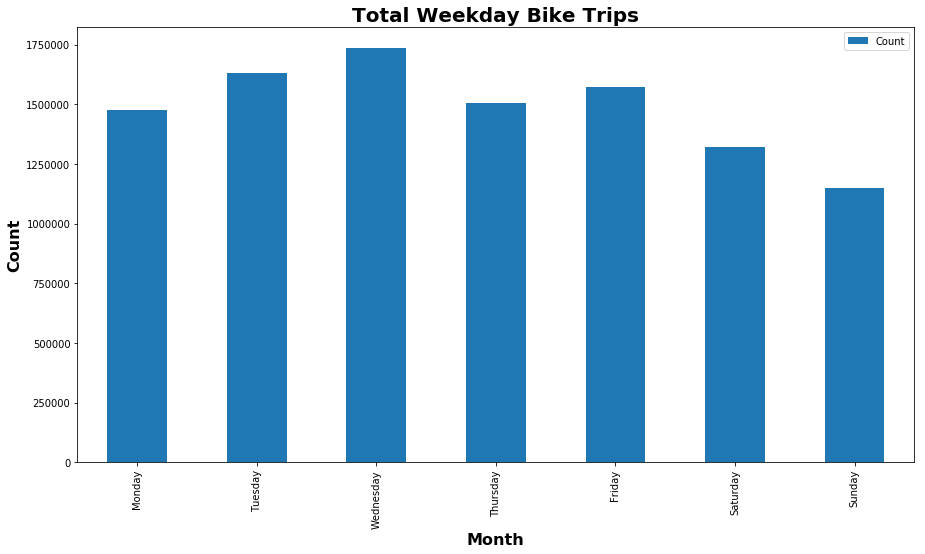

In [249]:
#Bar Graph for Monthly Trips
weekdaytrips_df.plot.bar(x= 'Weekday', y = 'Count')
plt.rcParams['figure.figsize'] = (10,6)
plt.xlabel('Month', fontweight="bold", fontsize=16)
plt.ylabel('Count', fontweight="bold", fontsize=16)
plt.title('Total Weekday Bike Trips', fontweight="bold", fontsize=20)
plt.bar
fig1 = plt.gcf()

In [250]:
#Save Image of Graph
fig1.savefig("./Images/WeekdayCount.png")

In [35]:
#Value Count of Starttime - Weekday Trips
monthlytrips_df = citibike2['starttime - Month'].value_counts().reset_index().rename(columns={'index': 'Month', "starttime - Month": 'Count'})
monthlytrips_df["Month Number"] = (7,6,5,4,3,1,2)
monthlytrips_df = monthlytrips_df.sort_values('Month Number',ascending=True)
monthlytrips_df

,Month,Count,Month Number
5,January,932399,1
6,February,906543,2
4,March,1255727,3
3,April,1627160,4
2,May,1755609,5
1,June,1925894,6
0,July,1984131,7


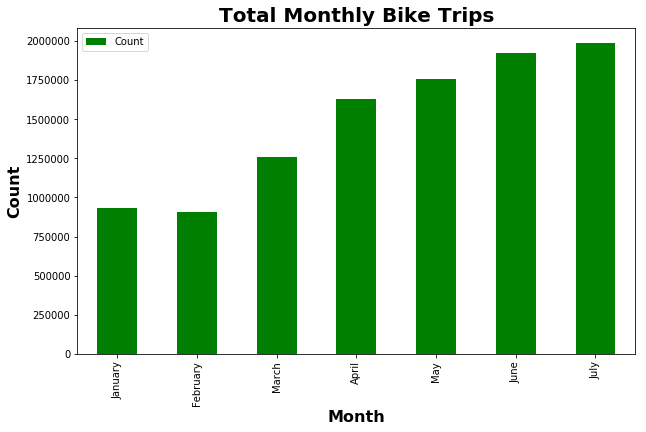

In [252]:
#Bar Graph for Monthly Trips
monthlytrips_df.plot.bar(x= 'Month', y = 'Count', color="g")
plt.rcParams['figure.figsize'] = (10,6)
plt.ylabel('Count', fontweight="bold", fontsize=16)
plt.xlabel('Month', fontweight="bold", fontsize=16)
plt.title('Total Monthly Bike Trips', fontweight="bold", fontsize=20)
plt.bar
fig2 = plt.gcf()

In [253]:
#Save Image of Graph
fig2.savefig("./Images/MonthlyBikeTrips.png")

In [38]:
#Gender
gender_df = citibike2["gender"].value_counts().reset_index().rename(columns={'index': 'Gender', "Gender": 'Count'})
gender_df.head()

,Gender,gender
0,Male,7741743
1,Female,2645720


In [39]:
#Creat Pie Graph for Male, Femal, Unknown
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# Pie Chart Values
sizes = [7741743, 2645720]

# The colors of each section of the pie chart
colors = ["#66b3ff", "#ff9999"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, .1)

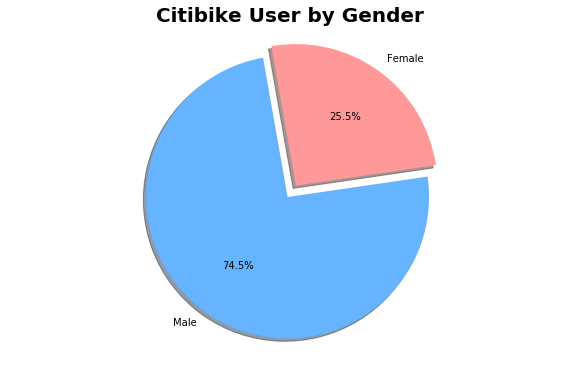

In [255]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Citibike User by Gender", fontweight="bold", fontsize=20)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
fig3 = plt.gcf()

In [256]:
#Save Image of Graph
fig3.savefig("./Images/TotalFatalitiesSortedbyGender.png")

In [86]:
#Age Count
age_df = citibike2[['age']]
age_df = age_df.sort_values('age',ascending=True)

In [133]:
# Create the bins in which Age Data will be held   
bins = [15, 25, 35, 45, 55, 65, 75, 85, 95, 99]
# Create the names for the four bins
group_names = ["16-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76-85", "86-95", "96-99"]

In [134]:
#Group Ages in Age Groups
age_df["Count"] = pd.cut(age_df['age'], bins, labels=group_names)

In [135]:
#Count of each Age Group
AgeBins_df = age_df[["Count"]]
AgeBins_df = age_df["Count"].value_counts().reset_index().rename(columns={'index': 'Age', "Age": 'Count'})
AgeBins_df = AgeBins_df.sort_values('Age', ascending=True)
AgeBins_df

,Age,Count
3,16-25,1154191
0,26-35,4094558
1,36-45,2344004
2,46-55,1667063
4,56-65,913139
5,66-75,188625
6,76-85,23784
7,86-95,1892
8,96-99,207


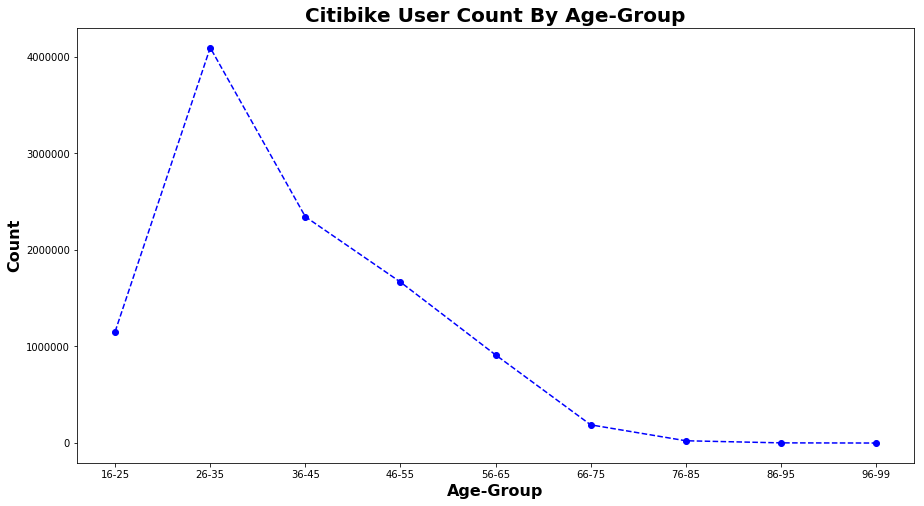

<Figure size 1080x576 with 0 Axes>

In [258]:
#Count of Citibike User By Age-Group
plt.plot(list(AgeBins_df.Age), list(AgeBins_df.Count), linestyle='--', marker='o', color="b")
plt.rcParams['figure.figsize'] = (15,8)
plt.title("Citibike User Count By Age-Group", fontweight="bold", fontsize=20)
plt.ylabel('Count', fontweight="bold", fontsize=16)
plt.xlabel('Age-Group', fontweight="bold", fontsize=16)
plt.show()
fig4 = plt.gcf()

In [259]:
#Save Image of Graph
fig4.savefig("./Images/UserAgeCount.png")

In [173]:
#Machine Learning Portion of the Data
citibike2.head()
citibikeML = citibike2[['tripduration', 'usertype', 'gender', 'age', 'starttime - Day', 'starttime - Weekday', 'starttime - Month',]].copy()
citibikeML.head()

,tripduration,usertype,gender,age,starttime - Day,starttime - Weekday,starttime - Month
0,320,Subscriber,Male,48,1,Tuesday,January
1,316,Subscriber,Male,55,1,Tuesday,January
2,591,Subscriber,Male,32,1,Tuesday,January
3,2719,Subscriber,Male,29,1,Tuesday,January
4,303,Subscriber,Male,40,1,Tuesday,January


In [236]:
#Machine Learning Portion of the Data
y = citibikeML['tripduration']
X = citibikeML.drop(columns = ["tripduration"])

In [237]:
X = pd.get_dummies(X)

In [238]:
X.head()


,age,starttime - Day,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male,starttime - Weekday_Friday,starttime - Weekday_Monday,starttime - Weekday_Saturday,starttime - Weekday_Sunday,starttime - Weekday_Thursday,starttime - Weekday_Tuesday,starttime - Weekday_Wednesday,starttime - Month_April,starttime - Month_February,starttime - Month_January,starttime - Month_July,starttime - Month_June,starttime - Month_March,starttime - Month_May
0,48,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,55,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,32,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,29,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,40,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [244]:
#Machine Learning Portion of the Data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model
# Fitting our model with all of our features in X
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
#score = model.score(X, y)
#print(f"R2 Score: {score}")

C:\Users\jcmar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


-0.03200565671419464
-0.030370700787861526


In [242]:
prediction = model.predict(X_test)